In [1]:
# Import libraries
import os
import pandas as pd
import numpy as np
import time
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec

import geopandas as gpd
from shapely.geometry import Point, Polygon
from fbprophet import Prophet

%matplotlib inline

In [2]:
# Get time-series NDVI of the field
field_ndvi = pd.read_csv('COURSE_28818554_ndvi_filled.csv')
field_ndvi

,nan-1,2015-11-18,2015-11-28,2016-02-06,2016-03-07,2016-03-27,2016-04-06,2016-04-16,2016-04-26,2016-05-06,...,2019-09-18,2019-09-23,2019-09-28,2019-10-03,2019-10-08,2019-10-13,2019-10-18,2019-10-23,2019-10-28,nan-2
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Get time-series mean NDVI
mean_ndvi = pd.DataFrame(np.mean(field_ndvi.iloc[:,1:212]), columns=['y'])
mean_ndvi.reset_index(inplace=True)
mean_ndvi['ds'] = pd.DatetimeIndex(mean_ndvi['index'])
mean_ndvi.drop(columns=['index'], inplace=True)
mean_ndvi

,y,ds
0,0.288154,2015-11-18
1,0.288297,2015-11-28
2,0.494499,2016-02-06
3,0.590840,2016-03-07
4,0.676447,2016-03-27
...,...,...
206,0.311318,2019-10-08
207,0.330712,2019-10-13
208,0.322163,2019-10-18
209,0.379559,2019-10-23


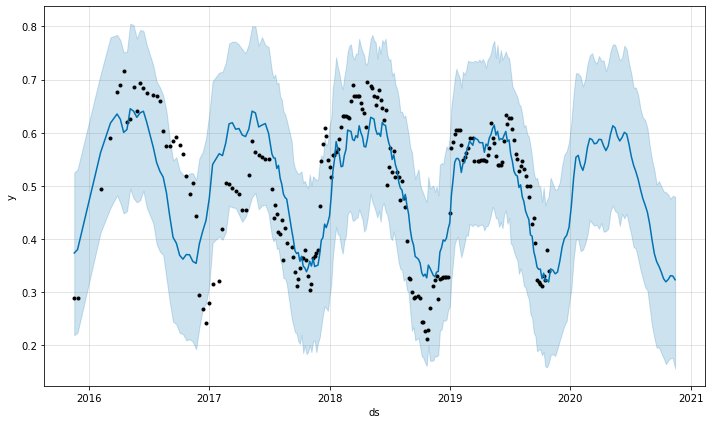

In [4]:
# Predict mean NDVI for next 55 weeks using fbprophet
model = Prophet(interval_width=0.95, daily_seasonality=False)
model.fit(mean_ndvi)
future_dates = model.make_future_dataframe(periods=55, freq='W')
forecast = model.predict(future_dates)
model.plot(forecast);

In [5]:
def plot_1x2(array, threshold=0.5, figsize=(18.5,5), clim=True, colorbar=True):
    
    plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(1, 2)
    gs.update(wspace=0.025, hspace=0.025) # set the spacing between axes.
    
    ax1 = plt.subplot(gs[0])
    reshape_array = array.values.reshape((512,512))
    ax1.title.set_text('NDVI')
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    plt.imshow(reshape_array)
    if clim:
        plt.clim(-1, 1)
    if colorbar:
        plt.colorbar()

    ax2 = plt.subplot(gs[1])
    ax2.title.set_text('Percentage of harvesting')
    ready_to_harvest = sum(array>threshold)
    already_harvested = sum(array<=threshold)
    plt.pie([ready_to_harvest,already_harvested])
    plt.legend(labels=['ready', 'harvested'], loc="best")

    plt.show()

2019-09-03


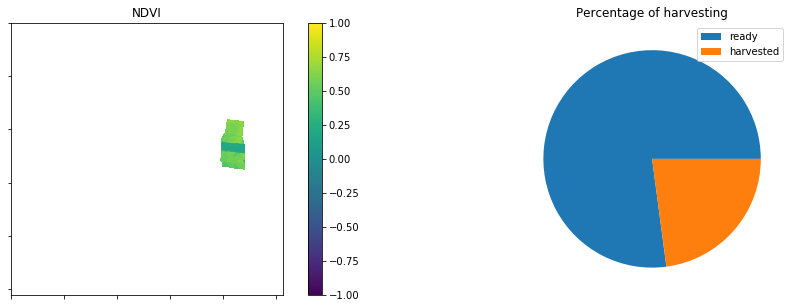

2019-09-08


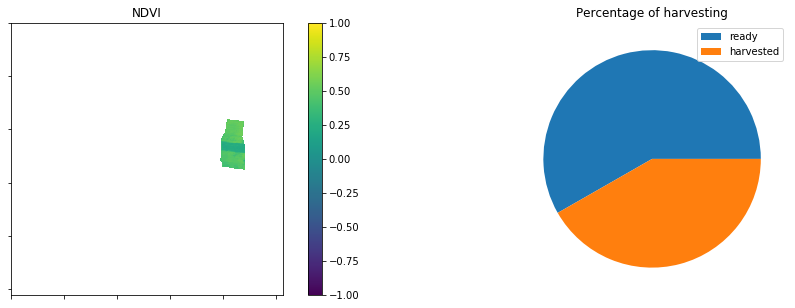

2019-09-13


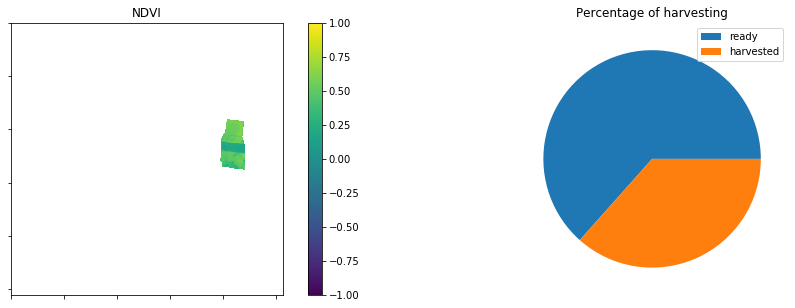

2019-09-18


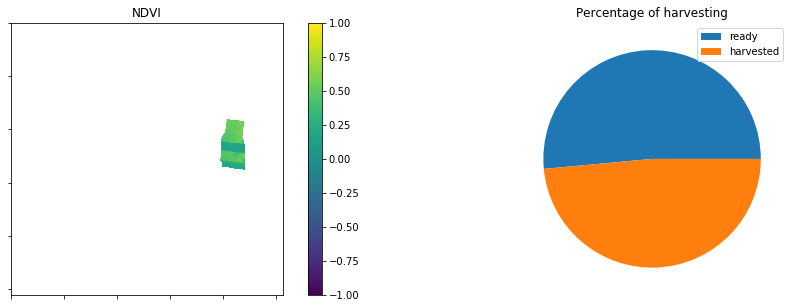

2019-09-23


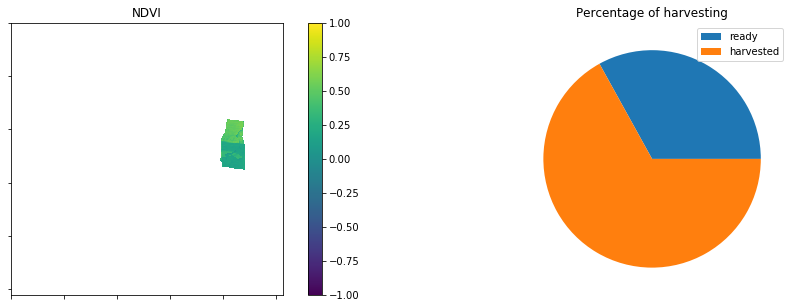

2019-09-28


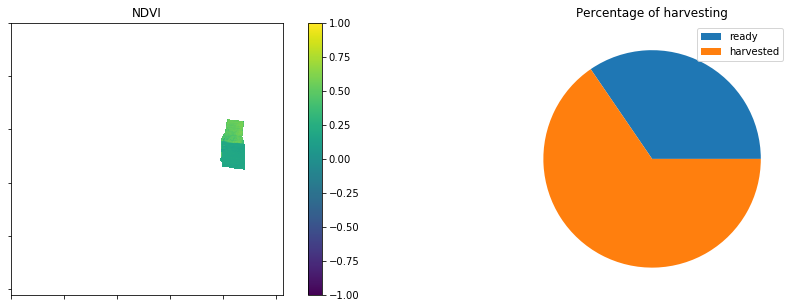

2019-10-03


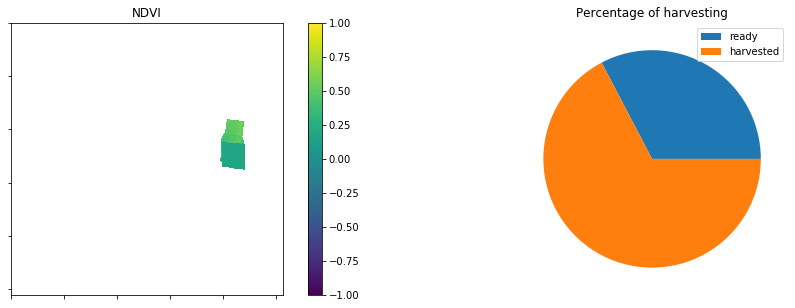

2019-10-08


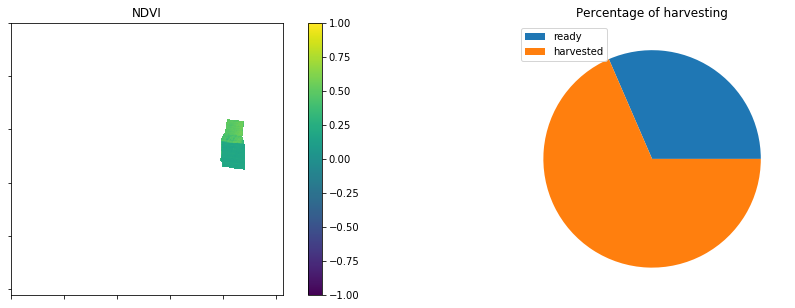

2019-10-13


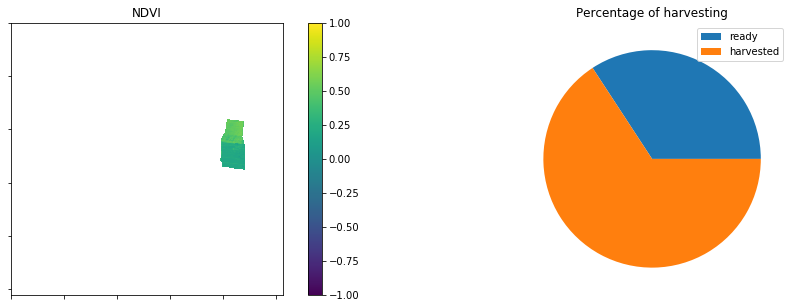

2019-10-18


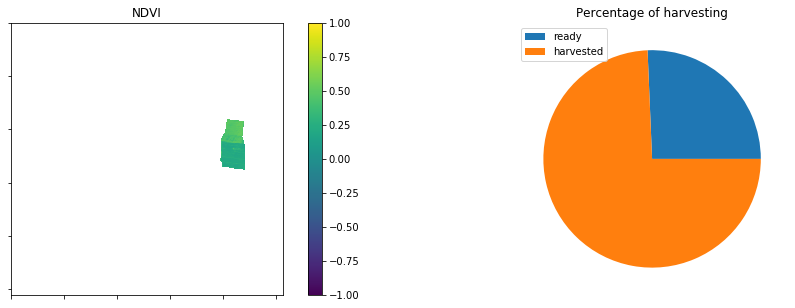

2019-10-23


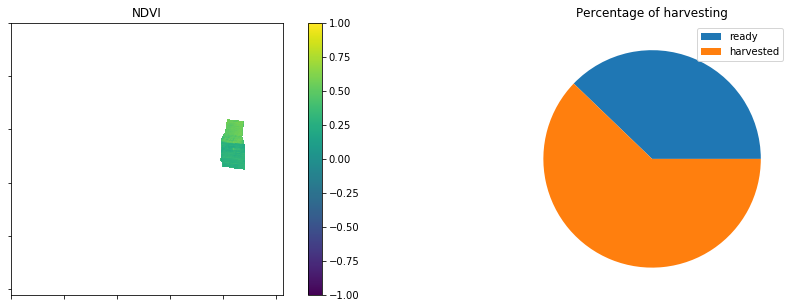

2019-10-28


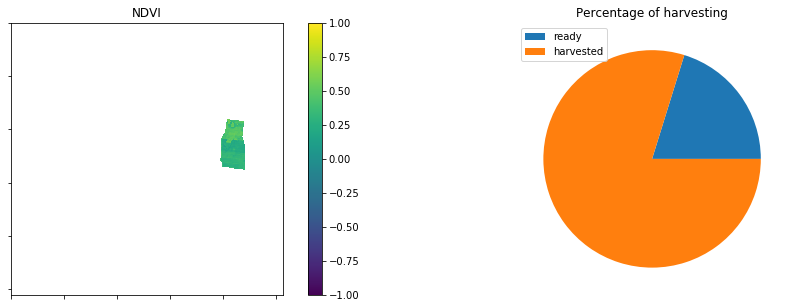

In [6]:
# Plot the harvesting progress
for i in range(200,len(field_ndvi.columns)-1):
    print(field_ndvi.columns[i])
    plot_1x2(field_ndvi.iloc[:,i], threshold=0.45)